In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
load_dotenv()

True

In [5]:
llm = ChatOpenAI() # loading the default openai model.

In [4]:
# Now we will define the state for our workflow
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [8]:
def generate_joke(state: JokeState):
    prompt = f"Generate a joke about {state['topic']}"
    response = llm.invoke(prompt).content

    return {
        'joke': response
    }

In [10]:
def generate_explanation(state: JokeState):
    prompt = f"Write an explanation for the joke: {state['joke']}"
    response = llm.invoke(prompt).content

    return {
        'explanation': response
    }

In [ ]:
# Registering the graph 
graph = StateGraph(JokeState)

# Adding the nodes into the graph
graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

# Adding the edges into the graph
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

# Adding checkpointers to the graph / workflow.
checkpointer = InMemorySaver() # As you are using a checkpointer, when you invoke use a thread_id to store the state values for that invoke.
# Above we have created a checkpointer object to maintain persistence in the workflow...

# Compiling the graph into a workflow.
workflow = graph.compile(checkpointer=checkpointer)

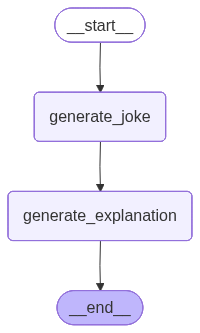

In [13]:
workflow

In [15]:
# Now we need to invoke this workflow. In order to invoke this workflow we need to pass the configureable which will have the threadId
threadId = 1 # Is workflow ka states RAM mein isi thread ka id ke against store hoga...
config1 = {
    'configurable':{'thread_id': threadId}
}

workflow.invoke({'topic': 'Pizza'}, config=config1)

{'topic': 'Pizza',
 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little saucy!',
 'explanation': 'This joke plays on the double meaning of the word "saucy." In one context, "saucy" can mean sassy or cheeky. In another context, it can refer to pizza sauce. So the joke implies that the pizza went to the doctor because it was feeling a little cheeky, but the twist is that the real reason is because it was feeling saucy (having too much sauce on it). It\'s a play on words that adds some humor to the situation.'}

In [16]:
# Get the final state of the workflow...
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Pizza', 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one context, "saucy" can mean sassy or cheeky. In another context, it can refer to pizza sauce. So the joke implies that the pizza went to the doctor because it was feeling a little cheeky, but the twist is that the real reason is because it was feeling saucy (having too much sauce on it). It\'s a play on words that adds some humor to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c85ec-af8c-6c74-8002-52c796a8c00b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-23T11:23:10.626902+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c85ec-81c6-6b8c-8001-1f35fded6264'}}, tasks=(), interrupts=())

In [18]:
# To get the intermediate states of the workflow...
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one context, "saucy" can mean sassy or cheeky. In another context, it can refer to pizza sauce. So the joke implies that the pizza went to the doctor because it was feeling a little cheeky, but the twist is that the real reason is because it was feeling saucy (having too much sauce on it). It\'s a play on words that adds some humor to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c85ec-af8c-6c74-8002-52c796a8c00b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-23T11:23:10.626902+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c85ec-81c6-6b8c-8001-1f35fded6264'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'Pizza', 'joke': 

In [21]:
type(workflow.get_state_history(config1))

generator

In [22]:
config2 = {
    'configurable': {
        'thread_id': 2
    }
}

workflow.invoke({'topic': 'Pasta'}, config=config2)

{'topic': 'Pasta',
 'joke': 'Why did the pasta chef break up with his girlfriend? Because she was always pesto-ing him about his sauce choices!',
 'explanation': 'This joke plays on the double meaning of the word "pesto." In Italian cuisine, pesto is a type of sauce typically made with basil, pine nuts, garlic, Parmesan cheese, and olive oil. However, in English, "pesto-ing" sounds like "pestering," which means to bother or annoy someone persistently. So, in this joke, the pasta chef broke up with his girlfriend because she was constantly annoying him about his choice of sauces, specifically pesto, which can be seen as a play on words.'}

In [23]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'Pasta', 'joke': 'Why did the pasta chef break up with his girlfriend? Because she was always pesto-ing him about his sauce choices!', 'explanation': 'This joke plays on the double meaning of the word "pesto." In Italian cuisine, pesto is a type of sauce typically made with basil, pine nuts, garlic, Parmesan cheese, and olive oil. However, in English, "pesto-ing" sounds like "pestering," which means to bother or annoy someone persistently. So, in this joke, the pasta chef broke up with his girlfriend because she was constantly annoying him about his choice of sauces, specifically pesto, which can be seen as a play on words.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0c860a-c8f1-6ce6-8002-ea114ea86e4b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-23T11:36:38.596095+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0c860a-b4

In [24]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Pasta', 'joke': 'Why did the pasta chef break up with his girlfriend? Because she was always pesto-ing him about his sauce choices!', 'explanation': 'This joke plays on the double meaning of the word "pesto." In Italian cuisine, pesto is a type of sauce typically made with basil, pine nuts, garlic, Parmesan cheese, and olive oil. However, in English, "pesto-ing" sounds like "pestering," which means to bother or annoy someone persistently. So, in this joke, the pasta chef broke up with his girlfriend because she was constantly annoying him about his choice of sauces, specifically pesto, which can be seen as a play on words.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0c860a-c8f1-6ce6-8002-ea114ea86e4b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-23T11:36:38.596095+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0c860a-b

# TIME TRAVEL

In [ ]:
workflow.get_state({'configurable': {
    'thread_id': '1',
    'checkpoint_id' : '1f0c85ec-6bd9-695a-8000-8774b5acfd45'
}})
# This will give the intermediate state at this intermediate checkpoint. It will not give the final state.

StateSnapshot(values={'topic': 'Pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0c85ec-6bd9-695a-8000-8774b5acfd45'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-11-23T11:23:03.528063+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c85ec-6bb8-63fe-bfff-6d9f5360dbfa'}}, tasks=(PregelTask(id='1ea25e34-e2ed-3f74-06df-266ad63095e4', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little saucy!'}),), interrupts=())

In [ ]:
# Now what we want to do is, we want to run the execution again from this particular checkpoint.
# I will not provide any initial_state. I will keep it None. I will provide just the thread_id and that particular check point.
workflow.invoke(None, {'configurable': {'thread_id': '1', 'checkpoint_id': '1f0c85ec-6bd9-695a-8000-8774b5acfd45'}})
# From this checkpoint, the previous flow will be re-executed...

{'topic': 'Pizza',
 'joke': "Why did the pizza go to the therapist?\nBecause it had too many toppings and couldn't handle the pressure!",
 'explanation': 'This joke plays on the idea that the pizza is a sentient being capable of feeling overwhelmed by its toppings. By humorously suggesting that the pizza needed therapy to cope with the stress of having too many toppings, it adds a whimsical and playful element to an otherwise mundane scenario. Ultimately, the humor comes from anthropomorphizing the pizza and attributing human-like emotions and behaviors to it.'}

In [28]:
# So now if I go to the get_state_history, I will get these new two 
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': "Why did the pizza go to the therapist?\nBecause it had too many toppings and couldn't handle the pressure!", 'explanation': 'This joke plays on the idea that the pizza is a sentient being capable of feeling overwhelmed by its toppings. By humorously suggesting that the pizza needed therapy to cope with the stress of having too many toppings, it adds a whimsical and playful element to an otherwise mundane scenario. Ultimately, the humor comes from anthropomorphizing the pizza and attributing human-like emotions and behaviors to it.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c895c-4f80-69e8-8002-ac6654d1ccff'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-23T17:56:42.875737+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c895c-395a-66be-8001-e9f631f5c58a'}}, tasks=(), interrupts=()),
 StateSnapshot(value


# Updating the State

In [ ]:
workflow.update_state({
    'configurable' : {'thread_id': '1', 'checkpoint_id': '1f0c85ec-6bd9-695a-8000-8774b5acfd45', 'checkpoint_ns': ''},
}, {'topic': 'samosa'})
# With this code I am updating the state.

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0c89ae-f505-6416-8001-d9347cf26297'}}

In [30]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c89ae-f505-6416-8001-d9347cf26297'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-11-23T18:33:41.402027+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c85ec-6bd9-695a-8000-8774b5acfd45'}}, tasks=(PregelTask(id='d1a99274-7fc5-7e1c-d2f4-39b7f849fca1', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'Pizza', 'joke': "Why did the pizza go to the therapist?\nBecause it had too many toppings and couldn't handle the pressure!", 'explanation': 'This joke plays on the idea that the pizza is a sentient being capable of feeling overwhelmed by its toppings. By humorously suggesting that the pizza needed therapy to cope with the stress of having too m

In [33]:
workflow.invoke(None, {'configurable': {'thread_id': '1', 'checkpoint_id': '1f0c89ae-f505-6416-8001-d9347cf26297', 'checkpoint_ns': ''}})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to school? \n\nTo become a little more well-rounded!',
 'explanation': 'This joke plays on the double meaning of the phrase "well-rounded." In one sense, being well-rounded can refer to someone who is knowledgeable in many different areas or subjects, which is why the samosa went to school - to become more knowledgeable and well-rounded. In another sense, being well-rounded can refer to having a shape that is not flat or uneven, which the samosa punnily resembles. So the joke is a play on words, using the idea of being well-rounded in both a literal and figurative sense.'}

In [34]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to school? \n\nTo become a little more well-rounded!', 'explanation': 'This joke plays on the double meaning of the phrase "well-rounded." In one sense, being well-rounded can refer to someone who is knowledgeable in many different areas or subjects, which is why the samosa went to school - to become more knowledgeable and well-rounded. In another sense, being well-rounded can refer to having a shape that is not flat or uneven, which the samosa punnily resembles. So the joke is a play on words, using the idea of being well-rounded in both a literal and figurative sense.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c89c5-932f-6b08-8003-ff86f0caa392'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-11-23T18:43:48.545192+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c89c5-812a-6098-8002-